#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###**Tecnológico de Monterrey**
###**PhD. María de la Paz Rico Fdz**

## **Reto->Entrega 1**
###**Limpieza, análisis, visualización y kmeans**
###**Fecha de entrega: 16/11/2022.**

## **Alumno: Maximiliano Morones Gómez**
## **Matrícula: A01793815**

Como parte inicial procedemos a implementar las instrucciones, las cuales nos servirán como guía para poder saber cuáles son los requisitos solicitados, y con base en eso poder dar inicio a nuestro trabajo.

##**Limpieza, análisis, visualización y kmeans**
En esta base de datos encontraras:

*   Aguas subterraneas.
*   Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

*   Limpieza de base de datos.
*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

    Identificando tendencias centrales promedio, media y mediana de los datos. 
    Identificar medidas de dispersión, máximo, mínimo .
    Identificar medidas de posición no centrales, los cuartiles, outliers.   
    Identificar correlaciones.
    Preparar los datos 
*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Una vez analizadas las instrucciones para el trabajo solicitado, procedemos a introducir algunas de las librerías que son indispensables para poder comenzar a trabajar

In [93]:
#Librerías a utilizar en el trabajo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.cluster import KMeans
import folium

Una vez declaradas las librerías que se utilizaran, procedemos a instalar la librería que nos brindara apoyo para poder trabajar con los mapas.

In [59]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
#Declaramos las librerías faltantes
import geopandas as gpd
from shapely.geometry import Point

Instaladas las librerías para poder trabajar con los mapas, procedemos a declarar los comandos necesarios para descargar y cargar nuestro conjunto o base de datos.

In [61]:
#Base de datos de calidad del agua de sitios de monitoreo de aguas subterráneas, año 2020.
input ='//content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

In [62]:
#Introducimos las líneas necesarias para poder leer y visualizar nuestra base de datos.
dataframe = pd.read_csv(input, encoding='latin1')
dataframe

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


Una vez que contamos con nuestra base de datos y podemos apreciar la información en esta.

Como siguiente paso procedemos a implementar y realizar un análisis de los datos, con la finalidad de ver si tenemos valores nulos.

Así como también se realiza una copia para poder realizar modificaciones.

In [63]:
dataframe_aguas_datosimportantes = dataframe.copy()
dataframe_aguas_datosimportantes.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


Introducimos el comando para tener una vista general de la información correspondiente a la tabla de arriba.

In [64]:
dataframe_aguas_datosimportantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Como siguiente parte introducimos el comando para poder observar en que columnas se encuentran ubicados los valores nulos, así como el número exacto de estos.

In [65]:
dataframe_aguas_datosimportantes.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

Como podemos observar, contamos con un total de 4 valores nulos en la columna "ALC_mg/L", 4 valores en la columna "CALIDAD_ALC", 6 valores en la columna "CONDUCT_mS/cm", 6 valores en la columna "CALIDAD_CONDUC", 1068 valores en la columna "SDT_mg/L", 2 valores en la columna "SDT_M_mg/L", 2 valores en la columna "CALIDAD_SDT_ra", 2 valores en la columna "CALIDAD_SDT_salin", 1 valor en la columna "DUR_mg/L", 1 valor en la columna "CALIDAD_DUR", 1 valor en la columna "N_NO3_mg/L", 1 valor en la columna "CALIDAD_N_NO3" y 434 valores en la columna "CONTAMINANTES".

Con esto es más que suficiente para poder determinar que si contamos con valores nulos.


Como siguiente punto y antes de dar continuidad a la parte correspondiente a la limpieza de datos, procederemos a realizar el borrado de datos que no son de utilidad, en este caso las columnas de tipo categóricas.

In [66]:
#Eliminado de las columnas categóricas 
columnas_con_valores_numericoss = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

dataframe_sincolumnascategoricas = dataframe_aguas_datosimportantes[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

dataframe_sincolumnascategoricas

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


Como siguiente parte checamos las columnas con las que contamos, así como los respectivos valores de estas.

In [67]:
#Podemos checar columna por columna los valores con los que se cuenta en cada una de estas.
print(dataframe_sincolumnascategoricas['SDT_mg/L'].unique())
print(dataframe_sincolumnascategoricas['SDT_mg/L'].value_counts())

[nan]
Series([], Name: SDT_mg/L, dtype: int64)


In [68]:
columnas_con_valores_numericoss = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in columnas_con_valores_numericoss:
  print(" El nombre de la columna es :" + i)
  #print("Valores unicos", df[i].unique())
  print(" La sumatoria por los valores unicos es :") 
  print(dataframe_sincolumnascategoricas[i].value_counts())

 El nombre de la columna es :ALC_mg/L
 La sumatoria por los valores unicos es :
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 El nombre de la columna es :CONDUCT_mS/cm
 La sumatoria por los valores unicos es :
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
 El nombre de la columna es :SDT_mg/L
 La sumatoria por los valores unicos es :
Series([], Name: SDT_mg/L, dtype: int64)
 El nombre de la columna es :SDT_M_mg/L
 La sumatoria por los valores unicos es :
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
 El nombre de la columna es :FLUORUROS_mg/L
 La sumatoria por los valores unicos 

<class 'pandas.core.frame.DataFrame'>


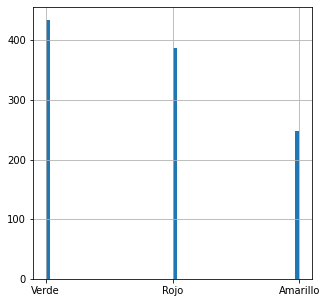

In [69]:
y= pd.DataFrame(dataframe_aguas_datosimportantes['SEMAFORO'])
y
print(type(y))
y['SEMAFORO'].hist(bins = 60, figsize=(5,5))

Como siguiente parte realizamos la conversión de los datos que son de tipo objeto hacia tipo flotante.

In [70]:
columnas_con_valores_numericoss = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in columnas_con_valores_numericoss:
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].astype('str')
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<25','25') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.2','0.2') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<20','20') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<1.1','1.1')
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.02','0.02') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.01','0.01') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.003','0.003')
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.005','0.004') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.0005','0.0004') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.0015','0.0015') 
  dataframe_sincolumnascategoricas[name] = dataframe_sincolumnascategoricas[name].str.replace('<0.025','0.025')  
  dataframe_sincolumnascategoricas[name]= dataframe_sincolumnascategoricas[name].astype('float')

dataframe_sincolumnascategoricas.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


Si observamos los datos podemos darnos cuenta de que la columna de nombre "SDT_mg/L", presenta un valor "0 non-null" lo cual quiere decir que esta se encuentra vacía, por consiguiente procedemos a eliminarla.

In [71]:
dataframe_sincolumnascategoricas.drop('SDT_mg/L', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Nuevamente, volvemos a imprimir nuestros datos con la finalidad de checar si es que es necesario realizar alguna otra modificación, o si estos ya se encuentran listos.

Como primera parte imprimimos la sección correspondiente para tener una vista general de la información.

In [72]:
print(dataframe_sincolumnascategoricas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB
None


Para la siguiente parte imprimiremos los valores nulos.

In [73]:
print(dataframe_sincolumnascategoricas.isnull().sum())

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64


Hasta este momento, el primer punto, el cual consiste en la limpieza de los datos, se encuentra listo y terminado.

Damos inicio al punto 2.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

1.  Identificando tendencias centrales promedio, media y mediana de los datos. 

2.  Identificar medidas de dispersión, máximo, mínimo .
    
3.  Identificar medidas de posición no centrales, los cuartiles, outliers.   

4.  Identificar correlaciones.

5.  Preparar los datos.

Punto 2.1


Como primera parte llevaremos a cabo una imputación, para lo cual se hará uso de la mediana.

In [74]:
dataframe_sincolumnascategoricas
columnas_con_valores_numericoss_nuevo = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] 

#Aplicamos la imputación.
for name in columnas_con_valores_numericoss_nuevo:
  mean = dataframe_sincolumnascategoricas[name].mean() 
  dataframe_sincolumnascategoricas[name]= dataframe_sincolumnascategoricas[name].replace(np.nan, mean)

#Aplicamos la mediana.
for name in columnas_con_valores_numericoss_nuevo:
  mediana = dataframe_sincolumnascategoricas[name].median() 
  dataframe_sincolumnascategoricas[name]= dataframe_sincolumnascategoricas[name].replace(np.nan, mediana)

dataframe_sincolumnascategoricas.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Una vez aplicada la imputación y la mediana, procedemos a checar nuestra base de datos, para lo cual nuevamente se imprime y checamos los cambios.

In [75]:
print(dataframe_sincolumnascategoricas.describe())

          ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.633759    1138.953013    896.101567        1.075600   347.938073   
std     116.655014    1242.056683   2748.950627        1.924278   359.500870   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.825000     822.500000    551.400000        0.503500   245.662350   
75%     292.423750    1321.250000    915.900000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.319759     0.019618     0.003030   
std            2052.457014     8.341222     0.035209     0.000894   
min

Como se puede apreciar en la base de datos anterior, efectivamente los cambios al aplicar la imputación y la mediana pueden verse reflejados en los datos.

Como último punto únicamente llevamos a cabo la transposición.

In [76]:
dataframe_sincolumnascategoricas.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.633759,116.655014,26.6400,164.048750,215.825000,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1138.953013,1242.056683,50.4000,505.500000,822.500000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,896.101567,2748.950627,25.0000,337.700000,551.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.075600,1.924278,0.2000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.938073,359.500870,20.0000,121.274100,245.662350,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.490356,2052.457014,1.1000,1.100000,1.100000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.319759,8.341222,0.0200,0.650932,2.082916,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.019618,0.035209,0.0100,0.010000,0.010000,0.010000,0.452200
CD_TOT_mg/L,1068.0,0.003030,0.000894,0.0030,0.003000,0.003000,0.003000,0.032110
CR_TOT_mg/L,1068.0,0.012476,0.154435,0.0040,0.004000,0.004000,0.004000,5.003200


De esta manera queda concluido el punto 1, el cual consiste en identificar las tendencias.

Punto 2.2


Como segunda parte identificaremos las medidas de dispersión solicitadas.

Para lo cual haremos uso de la matriz de correlación, en esta podremos identificaremos las medidas que se nos solicitan.

In [77]:
dataframe_sincolumnascategoricas.corr()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.219654,0.079285,0.068932,0.242957,-0.016448,-0.000394,0.073289,0.032686,-0.014253,0.069753,0.016930,0.129861,0.043423
CONDUCT_mS/cm,0.219654,1.000000,0.286406,-0.025177,0.692270,0.017807,0.219331,-0.003682,0.029040,0.004361,0.056967,0.024685,0.095925,0.083177
SDT_M_mg/L,0.079285,0.286406,1.000000,-0.013796,0.347115,-0.001133,0.101594,-0.010156,0.010800,-0.000507,0.020300,0.002496,0.018927,0.020104
FLUORUROS_mg/L,0.068932,-0.025177,-0.013796,1.000000,-0.149676,0.003564,-0.019780,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.242957,0.692270,0.347115,-0.149676,1.000000,0.031727,0.301410,-0.106494,0.025002,0.007336,0.065410,-0.017330,0.083821,0.059775
COLI_FEC_NMP/100_mL,-0.016448,0.017807,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,-0.000394,0.219331,0.101594,-0.019780,0.301410,-0.000969,1.000000,-0.008019,-0.009362,-0.015171,0.011332,-0.017341,-0.036854,0.013298
AS_TOT_mg/L,0.073289,-0.003682,-0.010156,0.444079,-0.106494,0.038151,-0.008019,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295
CD_TOT_mg/L,0.032686,0.029040,0.010800,-0.015123,0.025002,-0.001656,-0.009362,-0.009078,1.000000,-0.001824,-0.004631,-0.003080,-0.004205,-0.001036
CR_TOT_mg/L,-0.014253,0.004361,-0.000507,-0.005205,0.007336,-0.008938,-0.015171,-0.009698,-0.001824,1.000000,0.006998,-0.001149,-0.005112,0.000610


Punto 2.3


Como tercera parte identificaremos las medidas de posición no centrales, cuartiles y outliers.

Para este caso serán los outliers.

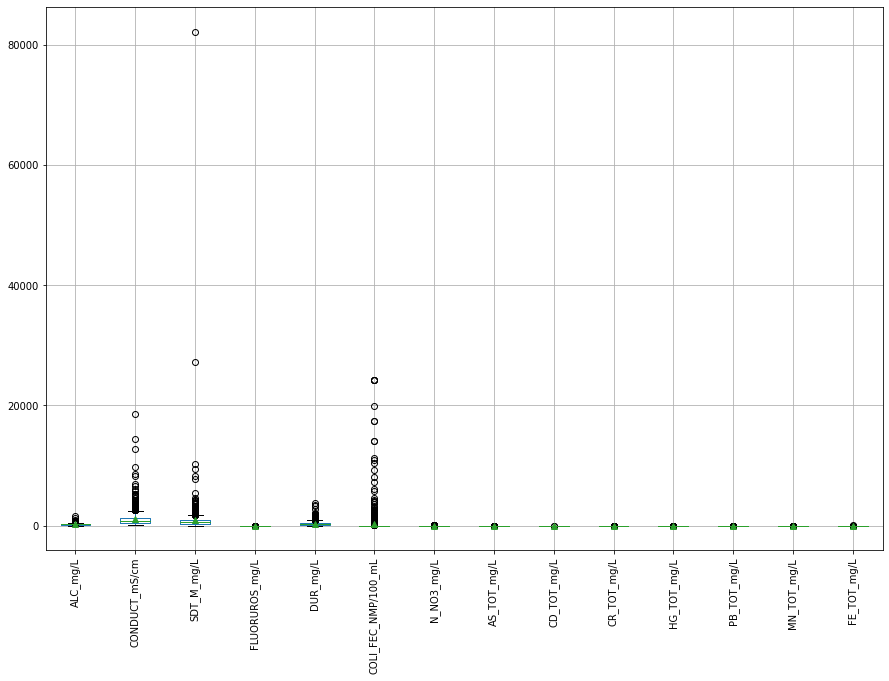

In [78]:
Outliers = dataframe_sincolumnascategoricas.boxplot(figsize = (15,10),showmeans = True)
Outliers.plot()
plt.xticks(rotation=90)
plt.show()

Punto 2.4


Como cuarta parte identificaremos las correlaciones.

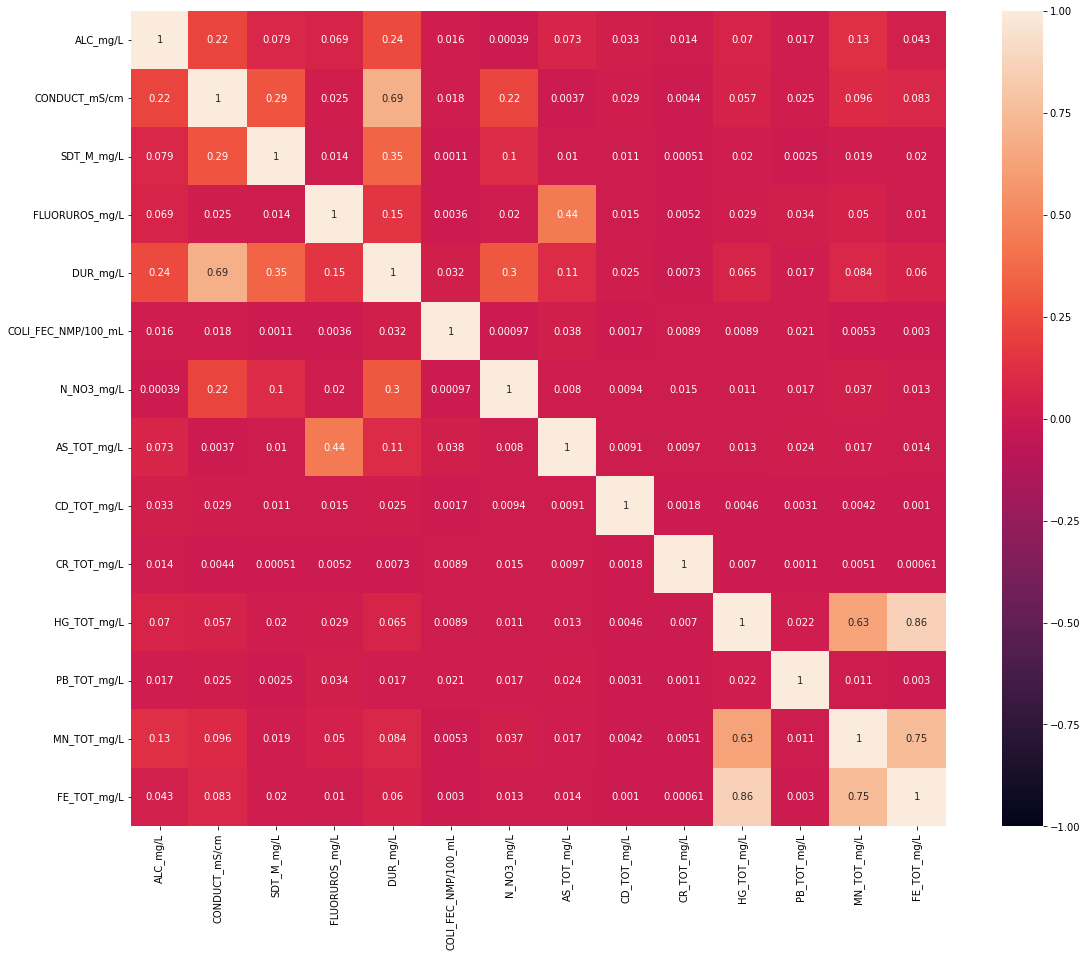

In [79]:
Correlacion = dataframe_sincolumnascategoricas.corr().abs() 

f, ax = plt.subplots(figsize = (20,15)) 

sns.heatmap(Correlacion, vmax = 1, vmin = -1, square = True, annot = True)

Punto 2.5


Preparar los datos.

Hasta este punto y con lo realizado anteriormente nuestros datos ya se encuentran preparados, por lo cual podemos proceder con el siguiente punto.

Damos inicio al punto 3 él consiste en realizar un análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Como primera parte es necesario identificar los datos que nos servirán para realizar este punto, estos consisten en la calidad del agua, las cuales podemos encontrar en las categorías verde, amarillo y rojo, clasificadas de mejor a peor, así como la ubicación geográfica la cual podemos encontrar y representar con las variables de latitud y longitud

In [80]:
#Variables de la calidad del agua, representada mediante las categorías verde, rojo y amarillo (tipo semáforo).
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


In [81]:
#Coordenadas donde podemos encontrar la ubicación geográfica.
df_ubicacion = dataframe_aguas_datosimportantes[['LONGITUD','LATITUD']]
df_ubicacion

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


Una vez que ya hemos planteado las variables de la calidad del agua, así como las coordenadas de la ubicación geográfica, procedemos a crear las columnas de las coordenadas, con la finalidad de poder introducirlas en Geopandas.

In [82]:
df_ubicacion
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.7828)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


Una vez añadidas las columnas procedemos a hacer uso del dataframe, para poder visualizar el dataframe en el mapa de Geopandas.

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


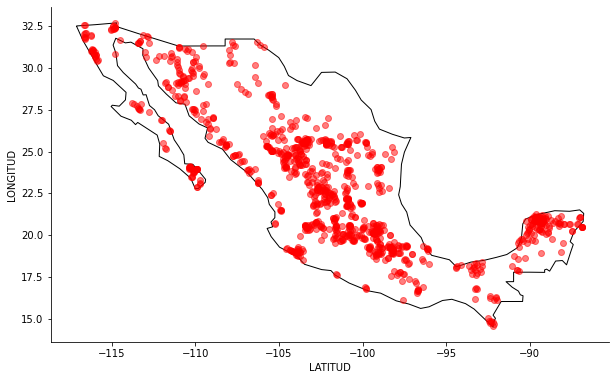

In [83]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
puntos_en_mapa

Una vez que tenemos ya los puntos ubicados en nuestro mapa, es necesario agrupar por color.

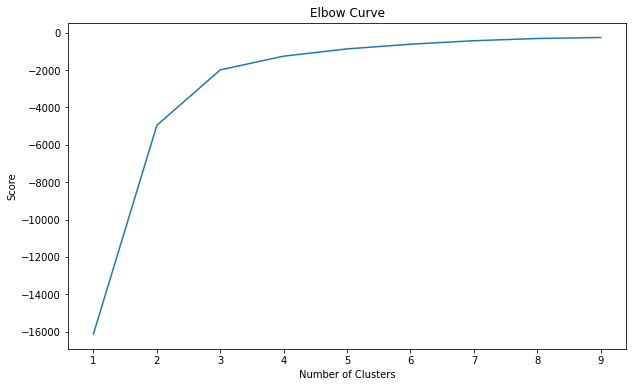

In [86]:
#Por consiguiente realizamos el análisis de clusters, así como él ploteo de la gráfica elbow o codo.
numero_de_closters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]
plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Como podemos observar en la gráfica anterior, el número adecuado de clusters es de 3, por consiguiente llevamos a cabo él ploteo de estos.

In [89]:
X = dataframe[['LONGITUD', 'LATITUD']]
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #Obtenemos la parte correspondiente a los centroides
labels = kmeans.predict(X) #Obtenemos la predicción de los labels.

#En esta parte se implementa el proceso para poder obtener los centros del cluster.
C = kmeans.cluster_centers_ #Valores correspondientes a los centroides.
C_DF = pd.DataFrame(C) #Conversión de centroides a dataframe
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #Conversión de dataframe a lista.
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #Conversión de dataframe a puntos para graficar.
puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

,0,1,Coordinates
0,-110.794488,28.438202,POINT (-110.79449 28.43820)
1,-90.728470,19.473362,POINT (-90.72847 19.47336)
2,-101.722127,22.254226,POINT (-101.72213 22.25423)


Como siguiente parte procedemos a imprimir los números de elementos que se tienen por cada cluster.

In [90]:
dataframe['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [92]:
print(y)
print(df_ubicacion)

     SEMAFORO
0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
...       ...
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde

[1068 rows x 1 columns]
       LONGITUD   LATITUD                  COORDENADAS
0    -102.02210  22.20887  POINT (-102.02210 22.20887)
1    -102.20075  21.99958  POINT (-102.20075 21.99958)
2    -102.28801  22.36685  POINT (-102.28801 22.36685)
3    -102.29449  22.18435  POINT (-102.29449 22.18435)
4    -110.24480  23.45138  POINT (-110.24480 23.45138)
...         ...       ...                          ...
1063  -99.54191  24.76036   POINT (-99.54191 24.76036)
1064  -99.70099  24.78280   POINT (-99.70099 24.78280)
1065  -99.82249  25.55197   POINT (-99.82249 25.55197)
1066 -100.32683  24.80118  POINT (-100.32683 24.80118)
1067 -100.73302  25.09380  POINT (-100.73302 25.09380)

[1068 rows x 3 columns]


In [95]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,SEMAPHORE
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


In [96]:
# Como parte final implementamos los comandos para poder plotear nuestro mapa y ver los puntos representados en los colores correspondientes al semáforo.
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo
lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=1)
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=12, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map